In [3]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [4]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [5]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [6]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [11]:
# import the class
from sklearn.linear_model import LogisticRegression


In [12]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

In [16]:
print(X_train.head())

    pregnant insulin   bmi age glucose  bp pedigree
688        1       0  28.3  29     107  50    0.181
696        7     480  30.4  43     142  90    0.128
119        4       0  28.2  22      97  60    0.443
135        2      49  21.1  26      96  68    0.647
676        6       0  30.9  31     195  70    0.328


In [17]:
print(X_train.dtypes)

pregnant    object
insulin     object
bmi         object
age         object
glucose     object
bp          object
pedigree    object
dtype: object


In [18]:
print(pima.isnull().sum())


pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64


In [19]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')

In [20]:
print(X_train.head())
print(X_train.dtypes)

     pregnant  insulin   bmi   age  glucose    bp  pedigree
688       1.0      0.0  28.3  29.0    107.0  50.0     0.181
696       7.0    480.0  30.4  43.0    142.0  90.0     0.128
119       4.0      0.0  28.2  22.0     97.0  60.0     0.443
135       2.0     49.0  21.1  26.0     96.0  68.0     0.647
676       6.0      0.0  30.9  31.0    195.0  70.0     0.328
pregnant    float64
insulin     float64
bmi         float64
age         float64
glucose     float64
bp          float64
pedigree    float64
dtype: object


In [22]:
print(pima.isnull().sum())

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64


In [23]:
print(pima.dtypes)

pregnant    object
glucose     object
bp          object
skin        object
insulin     object
bmi         object
pedigree    object
age         object
label       object
dtype: object


In [24]:
for col in pima.columns:
    pima[col] = pd.to_numeric(pima[col], errors='coerce')

In [25]:
pima = pd.get_dummies(pima, drop_first=True)

In [26]:
print(pima.dtypes)

pregnant    float64
glucose     float64
bp          float64
skin        float64
insulin     float64
bmi         float64
pedigree    float64
age         float64
label       float64
dtype: object


In [28]:
import numpy as np
print(np.isinf(pima).sum())

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64


In [29]:
pima.replace([np.inf, -np.inf], np.nan, inplace=True)
pima = pima.fillna(0)  # Replace NaN with 0

In [30]:
print(pima.isnull().sum())  # Check for missing values
print(np.isinf(pima).sum())  # Check for infinite values

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64
pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64


In [31]:
for col in pima.columns:
    print(f"Column '{col}' has unique values: {pima[col].unique()}")

Column 'pregnant' has unique values: [ 0.  6.  1.  8.  5.  3. 10.  2.  4.  7.  9. 11. 13. 15. 17. 12. 14.]
Column 'glucose' has unique values: [  0. 148.  85. 183.  89. 137. 116.  78. 115. 197. 125. 110. 168. 139.
 189. 166. 100. 118. 107. 103. 126.  99. 196. 119. 143. 147.  97. 145.
 117. 109. 158.  88.  92. 122. 138. 102.  90. 111. 180. 133. 106. 171.
 159. 146.  71. 105. 101. 176. 150.  73. 187.  84.  44. 141. 114.  95.
 129.  79.  62. 131. 112. 113.  74.  83. 136.  80. 123.  81. 134. 142.
 144.  93. 163. 151.  96. 155.  76. 160. 124. 162. 132. 120. 173. 170.
 128. 108. 154.  57. 156. 153. 188. 152. 104.  87.  75. 179. 130. 194.
 181. 135. 184. 140. 177. 164.  91. 165.  86. 193. 191. 161. 167.  77.
 182. 157. 178.  61.  98. 127.  82.  72. 172.  94. 175. 195.  68. 186.
 198. 121.  67. 174. 199.  56. 169. 149.  65. 190.]
Column 'bp' has unique values: [  0.  72.  66.  64.  40.  74.  50.  70.  96.  92.  80.  60.  84.  30.
  88.  90.  94.  76.  82.  75.  58.  78.  68. 110.  56.  62.  85

In [33]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # Drop corresponding labels


In [34]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

c:\Users\prajw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[111,  20],
       [ 18,  44]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

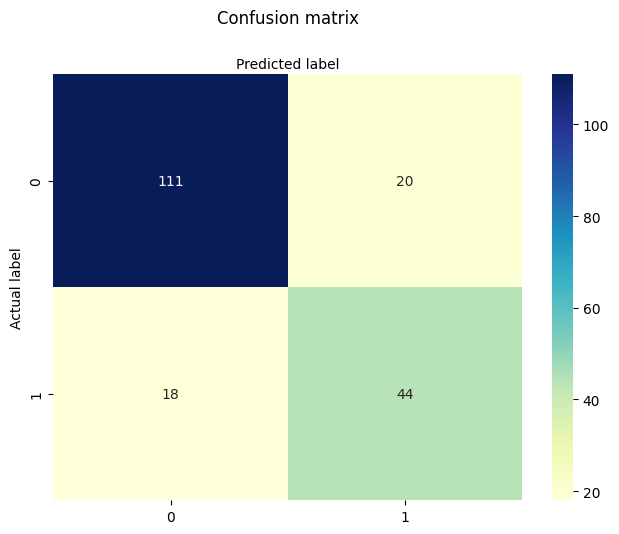

In [38]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [39]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.86      0.85      0.85       131
   with diabetes       0.69      0.71      0.70        62

        accuracy                           0.80       193
       macro avg       0.77      0.78      0.78       193
    weighted avg       0.80      0.80      0.80       193

